In [1]:
import numpy as np
from qiskit import IBMQ, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

In [2]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    qc = QuantumCircuit(n, name=name)
    oracle_matrix = np.identity(2**n)
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1
    qc.unitary(Operator(oracle_matrix), range(n))
    return qc

def diffuser(n):
    qc = QuantumCircuit(n, name='Diff - "V"')
    qc.h(range(n))
    qc.append(phase_oracle(n,[0]),range(n))
    qc.h(range(n))
    return qc

def Grover(n, marked):
    qc = QuantumCircuit(n, n)
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f'{n} qubits, basis state {marked} marked, {r} rounds')
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n,marked), range(n))
        qc.append(diffuser(n), range(n))
    qc.measure(range(n), range(n))
    return qc

5 qubits, basis state [2] marked, 4 rounds


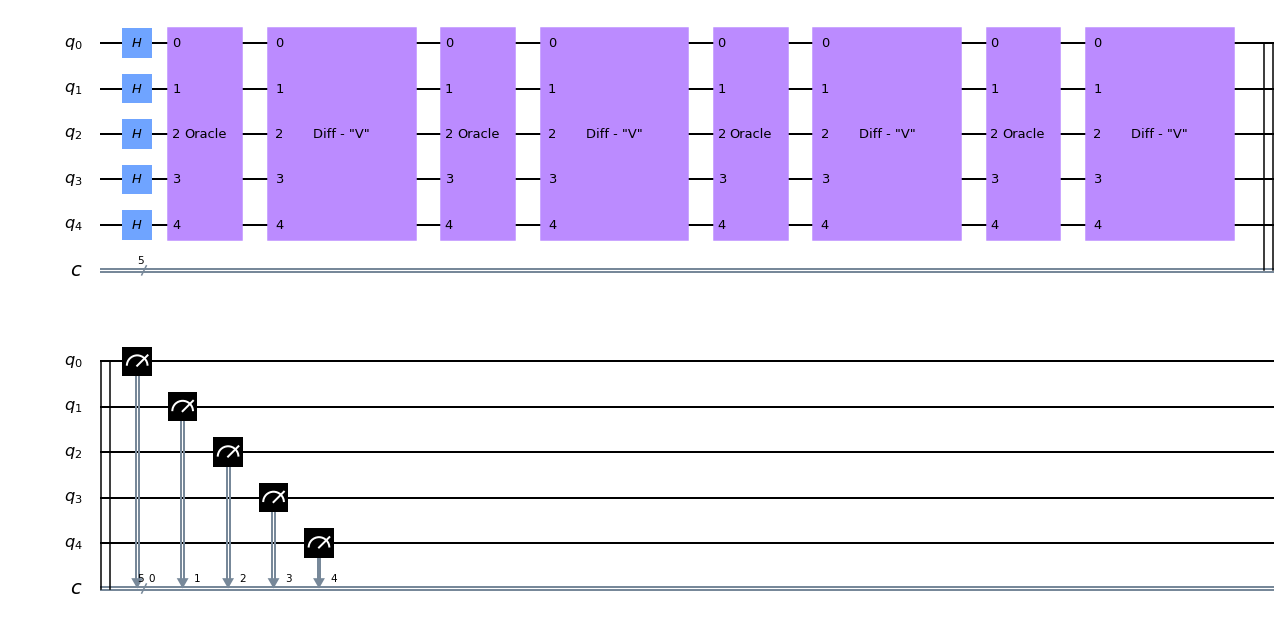

In [3]:
n = 5
x = np.random.randint(2**n)
marked = [x]
qc = Grover(n, marked)

qc.draw()

{'01001': 1, '10110': 1, '01010': 1, '00010': 9992, '11110': 1, '10011': 1, '11101': 1, '01101': 1, '00011': 1}
3.919534679768385


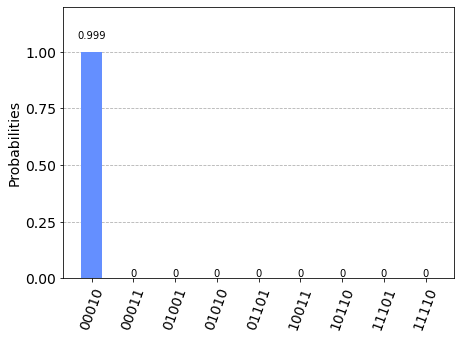

In [4]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=10000).result()
counts = result.get_counts(qc)
print(counts)
print(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)
plot_histogram(counts)

In [5]:
n = 3
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while y==x:
    y = np.random.randint(2**n)
marked = [x,y]
qc = Grover(n, marked)

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits == 5 and
                                   not x.configuration().simulator and x.status().operational==True))
#print("least busy backend: ", backend)
backend = provider.get_backend('ibmq_vigo')
%qiskit_job_watcher

shots = 1024
job = execute(qc, backend=backend, shots=shots, optimization_level=3)

3 qubits, basis state [1, 3] marked, 1 rounds


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

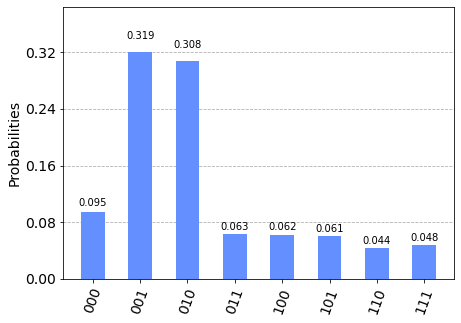

In [6]:
# job I ran before
backend = provider.get_backend('ibmq_vigo')
old_job = backend.retrieve_job('5ef1ee076c16190012682a5d')
results = old_job.result()
answer = results.get_counts()
plot_histogram(answer)